In [99]:
import pandas as pd
import numpy as np

In [100]:
df = pd.read_csv('ipl_matches.csv')

In [101]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [102]:
df.shape

(47406, 15)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47406 entries, 0 to 47405
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             47406 non-null  int64  
 1   date            47406 non-null  object 
 2   venue           47406 non-null  object 
 3   bat_team        47406 non-null  object 
 4   bowl_team       47406 non-null  object 
 5   batsman         47406 non-null  object 
 6   bowler          47405 non-null  object 
 7   runs            47405 non-null  float64
 8   wickets         47405 non-null  float64
 9   overs           47405 non-null  float64
 10  runs_last_5     47405 non-null  float64
 11  wickets_last_5  47405 non-null  float64
 12  striker         47405 non-null  float64
 13  non-striker     47405 non-null  float64
 14  total           47405 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 5.4+ MB


In [104]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


###Data cleaning

* Remove Unwanted columns
* Keeping only consistent teams
* Converting the column 'date' from string into datetime object

In [105]:
##removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (47406, 15)
After removing unwanted columns: (47406, 9)


In [106]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.4,2.0,0.0,222.0


In [107]:
df.index

RangeIndex(start=0, stop=47406, step=1)

In [108]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad'],
      dtype=object)

In [109]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [110]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (47406, 9)
After removing inconsistent teams: (31733, 9)


In [111]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [112]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (31733, 9)
After removing first 5 overs data: (23625, 9)


In [113]:
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


**Find the correlation Between Different Features**

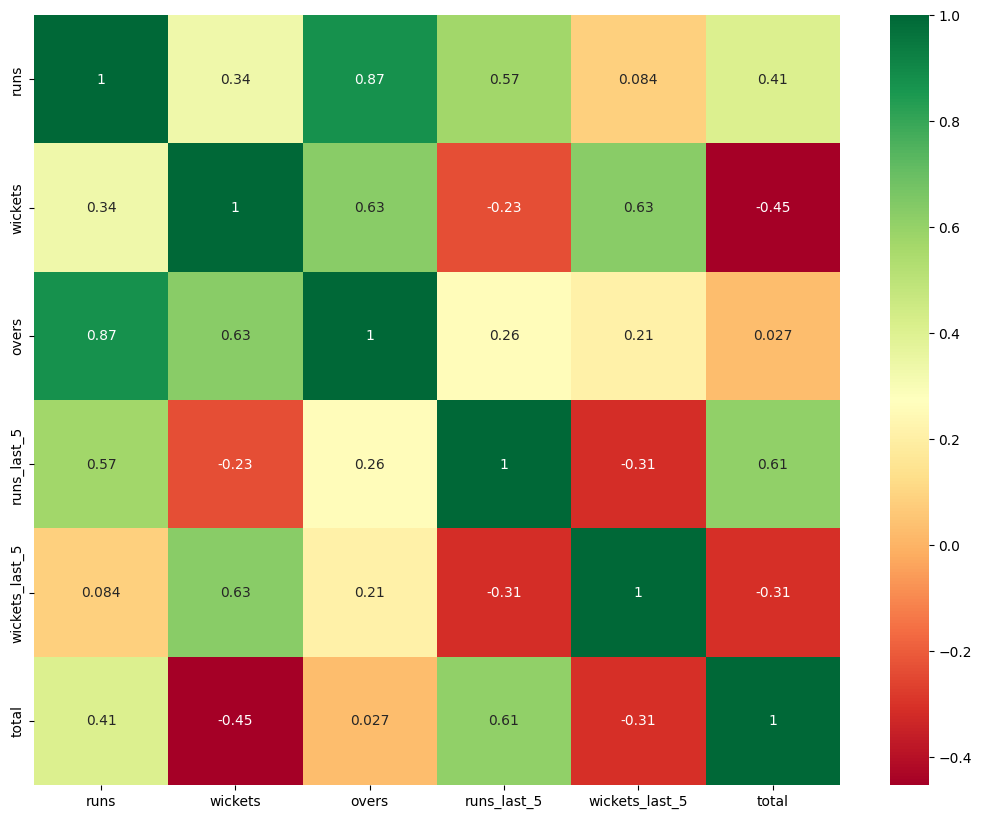

In [114]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df.drop(columns=[col for col in df.columns if col not in numeric_cols])
corr_matrix = df_numeric.corr()
top_corr_features = corr_matrix.index
# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [115]:

# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [116]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [117]:

# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2012]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2013]

y_train = encoded_df[encoded_df['date'].dt.year <= 2012]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2013]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (18596, 21) and Test set: (5029, 21)


##Model Building

In [118]:
X_test.shape

(5029, 21)

###Linear Regression

In [119]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred_linear = lr.predict(X_test)

####Linear regression model evaluation

In [121]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_linear)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_linear)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_linear))))


---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.10092954304053
Mean Squared Error (MSE): 297.24134199498104
Root Mean Squared Error (RMSE): 17.240688559189888


##Decission Tree

In [122]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [123]:
y_pred_dt = dt.predict(X_test)

####Model evaluation

In [124]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 18.059654006760788
Mean Squared Error (MSE): 582.6609663949096
Root Mean Squared Error (RMSE): 24.138371245693225


##Random Forests Model

In [125]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [126]:
y_pred_rfr = rfr.predict(X_test)

In [127]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rfr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rfr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rfr))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.92595055345662
Mean Squared Error (MSE): 412.9666280163496
Root Mean Squared Error (RMSE): 20.321580352333566


###INSIGHTS:
 ### As , we see Linear regression performing Best among the three regressor models so we select Linear regresssion model for boosting its performance  using adaboost algorithm

###AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
base_estimator = LinearRegression()
adb_regressor = AdaBoostRegressor(base_estimator, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [129]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

####Model Evaluation

In [130]:
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 75270939864.44577
Mean Squared Error (MSE): 5.088013865728183e+22
Root Mean Squared Error (RMSE): 225566262231.9256


##INSIGHT:

###As, we can see that using adbasoot we can't increase the model performnace so we linear regresssion model for further 

###Manual Predictions
* Model trained on the data from IPL Seasons 1 to 5 ie: (2008 to 2012)
*  Model tested on data from IPL Season 6 ie: (2013)
* Model predicts on furthr seasons data

In [131]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(lr.predict(temp_array)[0])

### Prediction 1
* Date: 16th April 2018
* IPL : Season 11
*  Match number: 13
*  Teams: Kolkata Knight Riders vs. Delhi Daredevils
*  First Innings final score: 200/9

In [132]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=8.4, runs=89, wickets=2, runs_in_prev_5=70, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 174 to 189


c:\Users\VDC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###Prediction 2
* Date: 7th May 2018
* IPL : Season 11
* Match number: 39
* Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore
* First Innings final score: 146/10

In [133]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 138 to 153


c:\Users\VDC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###Prediction 3
* Date: 17th May 2018
* IPL : Season 11
* Match number: 50
* Teams: Mumbai Indians vs. Kings XI Punjab
* First Innings final score: 186/8

In [134]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 180 to 195


c:\Users\VDC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###Prediction 4
*  Date: 10th May 2019
* IPL : Season 12
* Match number: 59 (Eliminator)
* Teams: Delhi Daredevils vs. Chennai Super Kings
* First Innings final score: 147/9

In [135]:

final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 138 to 153


c:\Users\VDC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###Prediction 5
* Date: 14th April 2019
* IPL : Season 12
* Match number: 30
* Teams: Sunrisers Hyderabad vs. Delhi Daredevils
* First Innings final score: 155/7

In [136]:

final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 159 to 174


c:\Users\VDC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Creating Report For EDA**

In [137]:
!pip install sweetviz

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [138]:
train = pd.DataFrame(X_train)

In [139]:
train

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.1,61.0,0.0,59.0,0.0
33,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.2,61.0,1.0,59.0,1.0
34,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.3,61.0,1.0,59.0,1.0
35,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.4,61.0,1.0,59.0,1.0
36,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.5,61.0,1.0,58.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38652,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,19.2,185.0,2.0,51.0,1.0
38653,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,19.3,186.0,2.0,51.0,1.0
38654,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,19.4,188.0,2.0,52.0,1.0
38655,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,19.5,190.0,2.0,54.0,1.0


In [140]:
test = pd.DataFrame(X_test)

In [141]:
test[:5]

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
38689,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,5.1,41.0,1.0,36.0,0.0
38690,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,5.2,43.0,1.0,38.0,0.0
38691,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,5.3,43.0,1.0,38.0,0.0
38692,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,5.4,44.0,1.0,35.0,0.0
38693,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,5.5,44.0,2.0,35.0,1.0


In [142]:
import sweetviz
my_report = sweetviz.analyze(([encoded_df,"encoded_df"]), target_feat= "total")

c:\Users\VDC\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left) 


In [143]:
my_report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [144]:
# Creating a pickle file for the classifier
import pickle
filename = 'lr-model.pkl'
pickle.dump(lr, open(filename, 'wb'))